In [5]:
# % pipenv install opencv 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1. 直方圖

[[30 30 30 ...  2  3  3]
 [30 30 30 ...  2  3  3]
 [30 30 30 ...  2  3  3]
 ...
 [11 11 12 ...  1  1  1]
 [11 11 11 ...  1  1  1]
 [10 11 11 ...  1  1  1]]


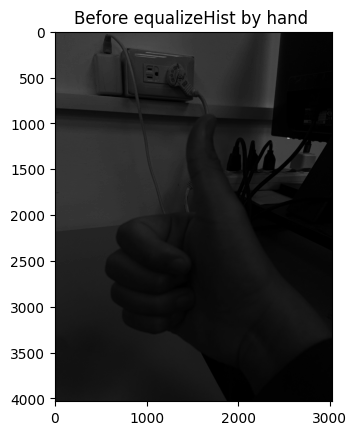

In [3]:
# 載入圖片
image = cv2.imread("hw1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_image)
# 顯示原圖 
plt.figure()
plt.title("Before equalizeHist by hand ")
plt.imshow(gray_image, cmap='gray')
plt.show()

#### 手刻法
1. 轉直方圖
2. PMF
3. CDF
4. CDF normaliztion 

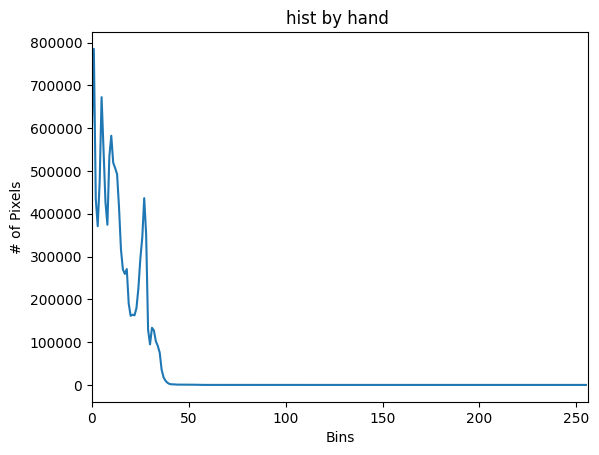

In [4]:
#把二維數據轉成一維直方圖
def calchist(gray_image):
    hist = np.zeros(256) 
    for h in range(gray_image.shape[0]):
        for w in range(gray_image.shape[1]):
            hist[gray_image[h,w]] += 1
    return hist
hist = calchist(gray_image)
# 顯示直方圖
plt.figure() #創建一個圖
plt.title("hist by hand ")
plt.xlabel("Bins") 
plt.ylabel("# of Pixels")
plt.plot(hist) #畫一維陣列的圖
plt.xlim([0, 256])#限制x範圍
plt.show()

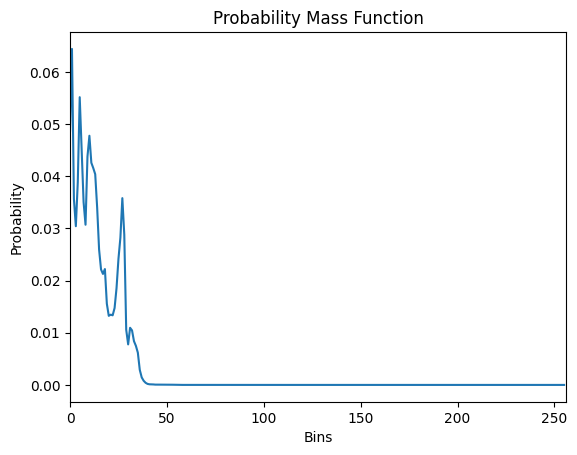

In [5]:
# 計算並顯示概率質量函數（PMF）
pmf = hist / sum(hist)
plt.figure()
plt.title("Probability Mass Function")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.plot(pmf)
plt.xlim([0, 256])
plt.show()

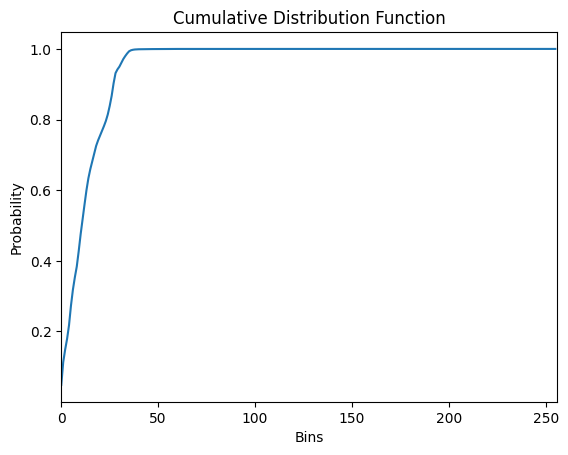

In [ ]:
# 計算累積分佈函數
def cumsum(pmf):
    cdf = np.zeros_like(pmf)  # 創建一個與PMF相同大小的零數組，用於存儲CDF的值
    cumulative_sum = 0  
    for i in range(len(pmf)):
        cumulative_sum += pmf[i]
        cdf[i] = cumulative_sum
    return cdf
cdf = cumsum(pmf) 
plt.figure()
plt.title("Cumulative Distribution Function")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.plot(cdf)
plt.xlim([0, 256])
plt.show()


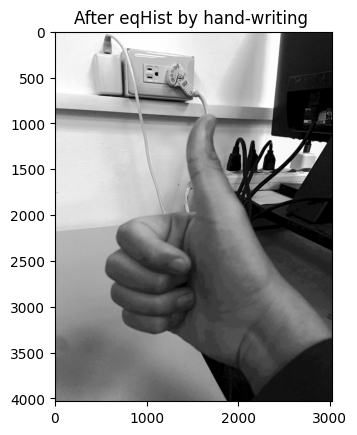

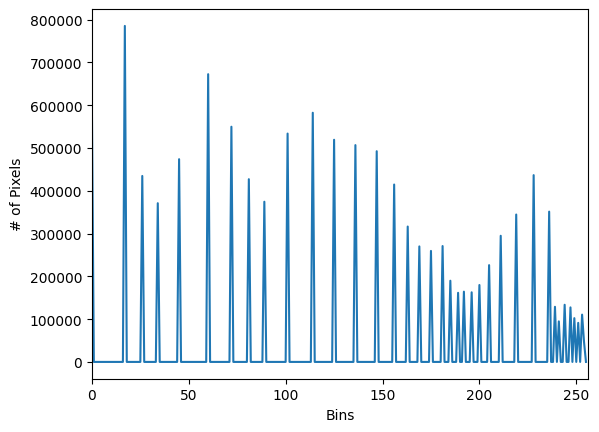

In [ ]:
# 換出轉移曲線 cdf[gray_image[height, width]] * (255-0)
# 找到換算的亮度 = 距離差  乘上 放大的比例
# ex: (30% - 1%  ) / (255-0) * (255-0)
# ex: (30% - 1%  ) / (255-0) * (255-0)
# 1. cdf - cdfmin 是指當下機率與最小的機率距離 
# 2.  (255/ (cdf_max - cdf_min) )) 是指這個距離放大的倍數
# 3. pmf 是指該個亮度在整體的佔比
# 4. cdf 是指小於該個亮度在整體的佔比 
# 正規化 CDF
cdf_min = cdf[0]
cdf_max = cdf[-1]
cdf_normalized = (cdf - cdf_min) *  255/ (cdf_max - cdf_min)
new_ = np.zeros_like(gray_image) # 創建一個新的二維陣列儲存圖片轉換結果
height, width = gray_image.shape

for w in range(width):
    for h in range(height):
        # 使用正規化後的 CDF 進行映射
        new_[h, w] = cdf_normalized[gray_image[h, w]]

#顯示圖片結果 
plt.figure()
plt.title("After eqHist by hand-writing ")
plt.imshow(new_, cmap='gray',vmin=0, vmax=255)
plt.show()

# 計算並顯示直方圖
hist = calchist(new_)
plt.figure()
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

#### openCV函數實作直方圖
1. 轉成直方圖 hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
2. 轉成等化後的圖像。eqHist = cv2.equalizeHist(gray_image)

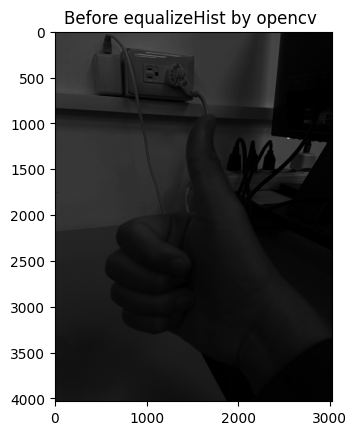

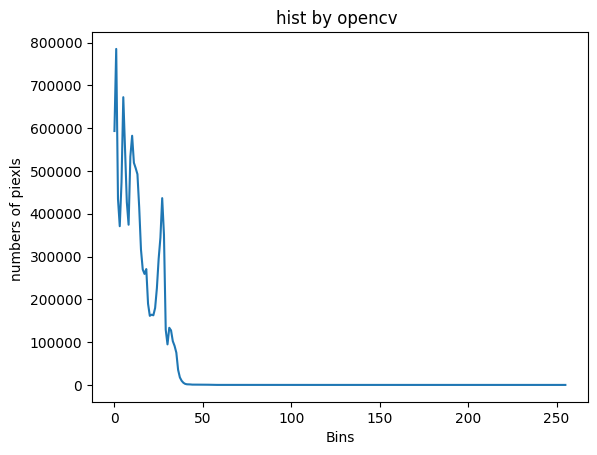

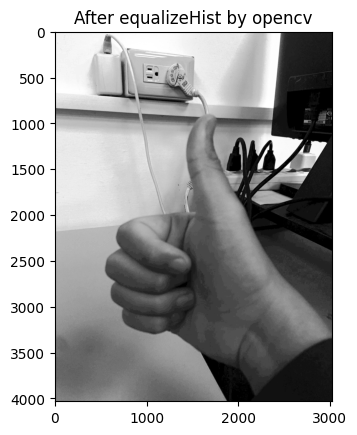

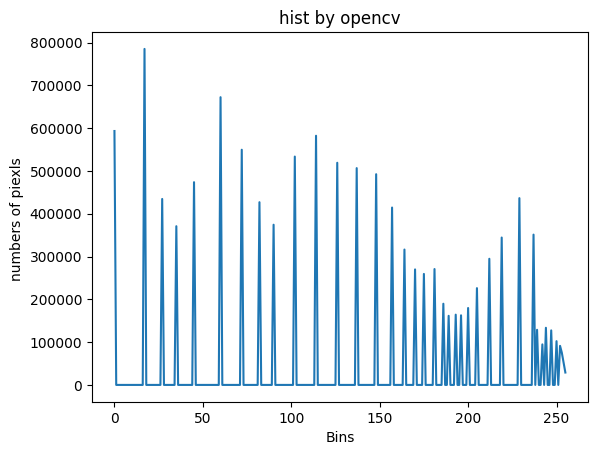

In [ ]:
# 顯示原圖片 & 直方圖 
plt.figure()
plt.title("Before equalizeHist by opencv ")
plt.imshow(gray_image, cmap='gray')
plt.show()
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist.flatten()
plt.figure()
plt.title("hist by opencv ")
plt.xlabel("Bins")
plt.ylabel("numbers of piexls ")
plt.plot(hist)
plt.show()

# 轉換成等化直方圖
eqHist = cv2.equalizeHist(gray_image)
# 顯示轉換後 & 直方圖
plt.figure()
plt.title("After equalizeHist by opencv")
plt.imshow(eqHist, cmap='gray')
plt.show()
hist = cv2.calcHist([eqHist], [0], None, [256], [0, 256])
hist.flatten()
# print(hist)
plt.figure()
plt.title("hist by opencv")
plt.xlabel("Bins")
plt.ylabel("numbers of piexls ")
plt.plot(hist)
plt.show()

#### 3. 加入胡椒鹽雜訊 (30%)
加入胡椒鹽雜訊 評分標準
需要顯示原圖以及加入胡椒鹽雜訊後的圖
* 完整完成功能(80分)
* 完整完成功能且註解詳細清楚(或者demo時說明清楚)(100)

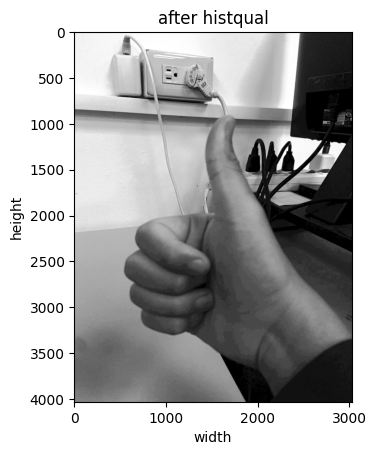

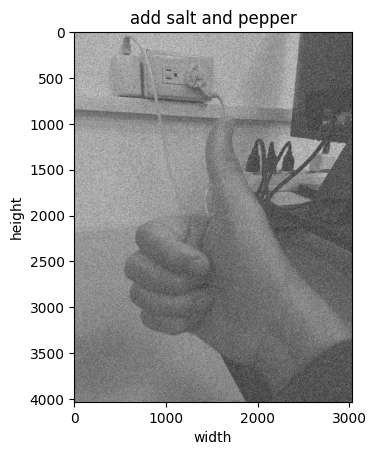

In [8]:
# img = cv2.imread('hw1.jpeg')
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# eqHist = cv2.equalizeHist(gray_image)

def show_img(img,title,xlabel,ylabel):
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def add_salt_and_pepper(img,fraction_salt:float,fraction_pepper:float):
    '''
    img:輸入的灰階圖像
    fraction_salt:整體影像的鹽比例255
    fraction_pepper:整體影像的胡椒比例
    return: 新的圖像
    '''
    row , col = img.shape[0:2]
    num_salt = int(np.ceil(fraction_salt * img.size ))#無條件進位並轉成整數
    num_pepper = int(np.ceil(fraction_pepper * img.size ))
    rand_arr = np.random.rand(img.shape[0],img.shape[1])
    # 複製原本圖片 
    output = img.copy()
    # randarr < fraction_salt 產生一個二維陣列 只要符合這個條件的都是true 
    # randarr > (1-fraction_pepper) 產生一個二維陣列 只要符合這個條件的都是true 
    output[rand_arr < fraction_salt] = 255
    output[rand_arr > (1-fraction_pepper)] = 0
    # for i in range(num_salt):
    #     x , y = np.random.randint(0, col),np.random.randint(0, row)# 找隨機的x,y座標 換成255
    #     output[y,x] = 255
    
    # for i in range(num_pepper):
    #     x , y = np.random.randint(0, col),np.random.randint(0, row)# 找出隨機的x,y座標 換成0
    #     output[y,x] = 0 
    return output        


show_img(eqHist,title="after histqual",xlabel="width",ylabel="height")
add_noise = add_salt_and_pepper(eqHist,0.3,0.3)
show_img(add_noise,title="add salt and pepper",xlabel="width",ylabel="height")

#### 4. Mean filter 或者 Median filter評分標準
需要顯示原圖及經由filter得圖
* 使用OpenCV function完成其中一種filter並註解(50分)
* 使用OpenCV function完成兩種filter並註解(60分)
* 使用手刻法完成其中一種filter並註解(80分)
* 使用手刻法完成兩種filter並註解(100分)

1. Mean and median filter by openCV

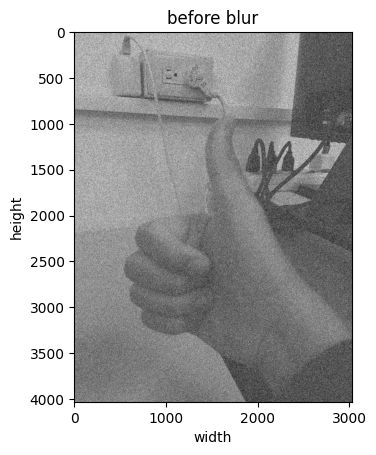

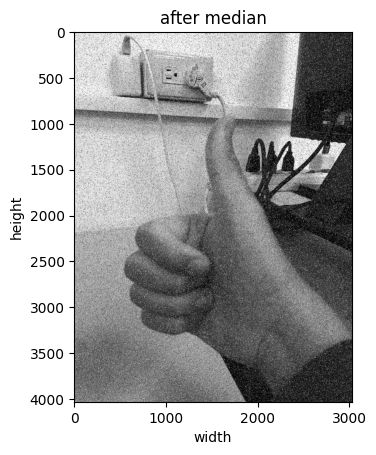

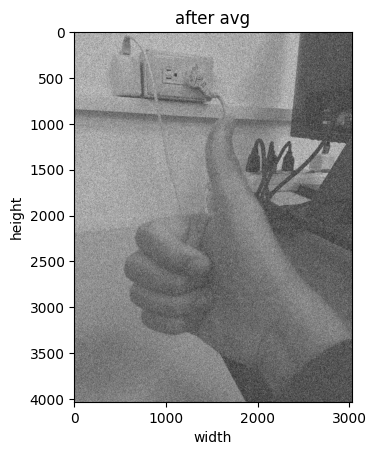

In [ ]:
def show_img(img,title,xlabel,ylabel):
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
img = cv2.imread('hw1.jpeg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 轉成等化圖對比度拉高
eqHist = cv2.equalizeHist(gray_image)
# 加入胡椒鹽雜訊 0.3 白點比例 0.3 黑點比例 
add_noise = add_salt_and_pepper(eqHist,0.3,0.3)
# 中值濾波
median = cv2.medianBlur(add_noise, ksize=3)  # ksize 是核心大小，決定了濾波器的範圍
# 平均值濾波
avg_blur = cv2.blur(add_noise, (3, 3))  # 使用 3x3 的ksize进行平均值滤波
# 顯示圖片
show_img(add_noise,title="before blur",xlabel="width",ylabel="height")
show_img(median,title="after median",xlabel="width",ylabel="height")
show_img(avg_blur,title="after avg",xlabel="width",ylabel="height")

2. Mean and median filter by hand

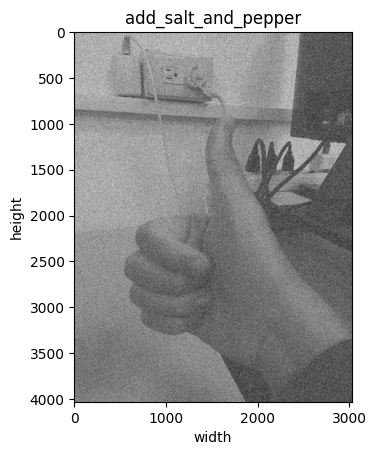

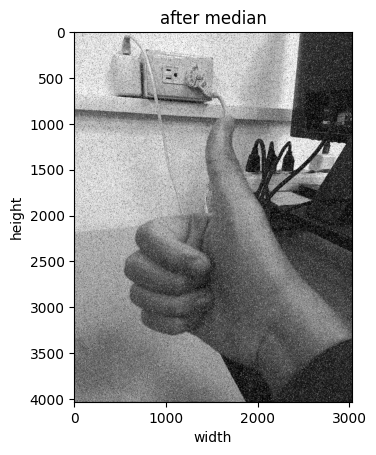

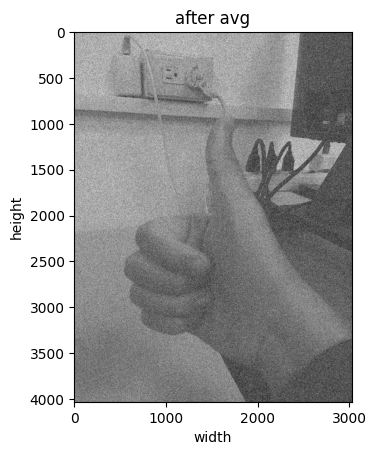

In [6]:
def show_img(img,title,xlabel,ylabel):
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def add_salt_and_pepper(img,fraction_salt:float,fraction_pepper:float):
    row , col = img.shape[0:2]
    num_salt = int(np.ceil(fraction_salt * img.size ))#無條件進位並轉成整數
    num_pepper = int(np.ceil(fraction_pepper * img.size ))
    rand_arr = np.random.rand(img.shape[0],img.shape[1])
    output = img.copy()
    # randarr < fraction_salt 產生一個二維陣列 只要符合這個條件的都是true 
    # randarr > (1-fraction_pepper) 產生一個二維陣列 只要符合這個條件的都是true 
    output[rand_arr < fraction_salt] = 255
    output[rand_arr > (1-fraction_pepper)] = 0
    return output       
def gussian_filter(img,kernel,kernel_size):
    r = kernel_size //2 # 圖片半徑 r=2 
    height,width = img.shape[0:2]
    # 填充 
    padding_img = np.pad(img,(r,r)) 
    # print(padding_img)
    new_img = np.zeros_like(img)
    for y in range(r,height+r):
        for x in range(r,width+r):
            region = padding_img[(y-r):(y+r+1),(x-r):(x+r+1)]# y ,x = 2-2,2+2+1
            conv = np.sum(region*kernel)
            new_img[y-r,x-r] = conv
    return new_img
def medianblur(img,kernel_size):
    r = kernel_size //2 # 圖片半徑 r=2 
    height,width = img.shape[0:2]
    # 填充 
    padding_img = np.pad(img,(r,r)) 
    # print(padding_img)
    new_img = np.zeros_like(img)
    for y in range(r,height+r):
        for x in range(r,width+r):
            region = padding_img[(y-r):(y+r+1),(x-r):(x+r+1)]# y ,x = 2-2,2+2+1
            new_img[y-r,x-r] = np.median(region)
    return new_img
    
def meanblur(img,kernel_size):
    r = kernel_size //2 # 圖片半徑 r=2 
    height,width = img.shape[0:2]
    # 填充 
    padding_img = np.pad(img,(r,r)) 
    new_img = np.zeros_like(img)
    for y in range(r,height+r):
        for x in range(r,width+r):
            region = padding_img[(y-r):(y+r+1),(x-r):(x+r+1)]# y ,x = 2-2,2+2+1
            new_img[y-r,x-r] = np.mean(region)
    return new_img

img = cv2.imread('hw1.jpeg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 轉成等化圖對比度拉高
eqHist = cv2.equalizeHist(gray_image)
# 加入胡椒鹽雜訊 0.3 白點比例 0.3 黑點比例 
add_noise = add_salt_and_pepper(eqHist,0.3,0.3)
# 中值濾波
median = medianblur(add_noise,3)  # 手刻濾波器 採用範圍 k = 3 
# 平均值濾波
avg_blur = meanblur(add_noise,3)  # 手刻濾波器
# 顯示圖片
show_img(add_noise,title="add_salt_and_pepper",xlabel="width",ylabel="height")
show_img(median,title="after median",xlabel="width",ylabel="height")
show_img(avg_blur,title="after avg",xlabel="width",ylabel="height")